In [1]:
#install and import dependencies

In [2]:
!pip install easyocr
!pip install imutils

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [ ]:
reader = easyocr.Reader(['en'])


In [249]:
img = cv2.imread('img6.')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_8k9tw8n\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [237]:
#Apply filter and edges for localization

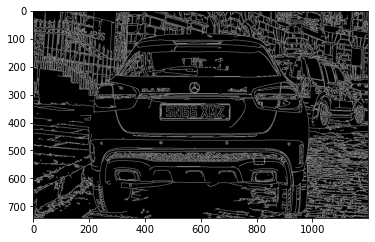

In [238]:
bfilter = cv2.bilateralFilter(gray, 5, 20, 100) #Noise Reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [239]:
#Find Contours and Apply Mask

In [240]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10 ]

In [241]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 20, True)
    if len(approx) == 4:
        print("yes")
        location = approx
        break

In [242]:
location

In [243]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_8k9tw8n\opencv\modules\imgproc\src\drawing.cpp:2598: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'


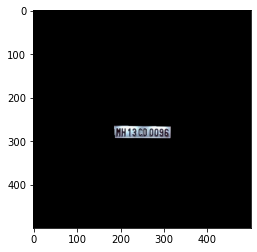

In [244]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [245]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


            

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
#Use Easy OCR To Read Text

In [246]:
result = reader.readtext(cropped_image)
result

[([[0, 2], [128, 2], [128, 28], [0, 28]], 'NH 13 CD 0096', 0.7857204676254008)]

In [247]:
#Render Result

In [248]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

IndexError: index 2 is out of bounds for axis 0 with size 2